# Multiple regression

In this notebook we see how to calculate the regression equation linking UK imports to GDP and to the price of imports.  This was used in the second of the chapters on regression in the book, so we show how to replicate those results.

First import some libraries we will need for data analysis, in particular, regression:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf               # This provides the regression modelling routines
import statsmodels.api as sm2
from pandas import DataFrame                        # Needed for manipulating data into the dataframe

Now, read in a data file, into the dataframe 'df'.  As in the book, contains data on imports, GDP (both nominal), the GDP deflator, an import price index and the RPI.  Data are from 1973-2010.

In [2]:
df = pd.read_csv('imports.csv')
df.head()               

,year,nom_imports,nom_gdp,gdp_defl,nom_price_m,rpi
0,1973,18.8,74.0,24.6,21.5,25.1
1,1974,27.0,83.8,28.7,31.3,29.1
2,1975,28.7,105.9,35.7,35.6,36.1
3,1976,36.5,125.2,41.4,43.6,42.1
4,1977,42.3,145.7,47.0,50.5,48.8


Checking the final observations:

In [3]:
df.tail()

,year,nom_imports,nom_gdp,gdp_defl,nom_price_m,rpi
33,2006,411.7,1297.3,211.7,113.9,209.3
34,2007,408.6,1372.6,218.1,113.9,218.3
35,2008,453.1,1400.1,224.5,130.2,227.0
36,2009,413.1,1361.0,227.8,133.1,225.8
37,2010,468.4,1429.2,234.4,140.9,236.3


## Data transformations
Most economic relationships are defined in real terms, so we create real value series for imports, GDP and the price of imports.  These are the important variables we shall use so are labelled simply as 'imports', 'price_m' and 'gdp'.

In [4]:
df['imports'] = df['nom_imports'] / df['nom_price_m'] * 100
df['price_m'] = df['nom_price_m'] / df['rpi'] * 133.3
df['gdp'] = df['nom_gdp'] / df['gdp_defl'] * 134.1

In [5]:
df.head()

,year,nom_imports,nom_gdp,gdp_defl,nom_price_m,rpi,imports,price_m,gdp
0,1973,18.8,74.0,24.6,21.5,25.1,87.441860,114.181275,403.390244
1,1974,27.0,83.8,28.7,31.3,29.1,86.261981,143.377663,391.553310
2,1975,28.7,105.9,35.7,35.6,36.1,80.617978,131.453740,397.792437
3,1976,36.5,125.2,41.4,43.6,42.1,83.715596,138.049406,405.539130
4,1977,42.3,145.7,47.0,50.5,48.8,83.762376,137.943648,415.710000


In [ ]:
df.tail()

## Charts of the data
It is first useful to plot the data to get some basic understanding of what is happening.

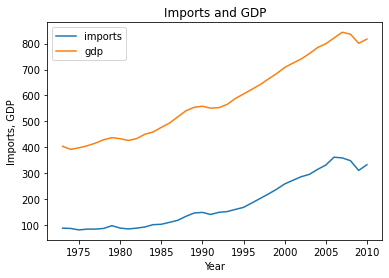

In [6]:
plt.plot("year", "imports", data = df)
plt.plot("year", "gdp", data = df)

# apply labels to axes and title, show legend
plt.xlabel('Year')
plt.ylabel('Imports, GDP')
plt.title('Imports and GDP')
plt.legend()                              # Add legend to show which series is which

# Display the graph.
plt.show()

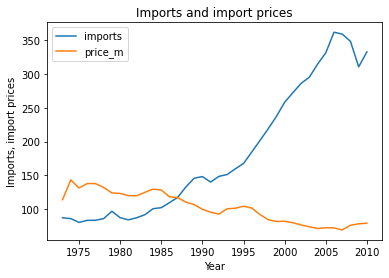

In [7]:
plt.plot("year", "imports", data = df)
plt.plot("year", "price_m", data = df)

# apply labels to axes and title, show legend
plt.xlabel('Year')
plt.ylabel('Imports, import prices')
plt.title('Imports and import prices')
plt.legend()                              # Add legend to show which series is which

# Display the graph.
plt.show()

## Correlation
Next we calculate correlations, using the 'corrcoef' method from numpy (np). 

In [8]:
np.corrcoef(df['imports'], df['gdp'])

array([[1.        , 0.98826423],
       [0.98826423, 1.        ]])

In [9]:
np.corrcoef(df['imports'], df['price_m'])

array([[ 1.        , -0.93048835],
       [-0.93048835,  1.        ]])

Both correlations are high, over 0.9 in absolute value.  

## Linear regression

Now calculate an OLS regression.  We use the data 1973-2003 (31 observations) for estimation.  Later observations can be used for prediction purposes, to help evaluate the model.

In [10]:
model = smf.ols('imports ~ gdp + price_m', data=df[0:31])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                imports   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     368.7
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           7.70e-21
Time:                        12:05:59   Log-Likelihood:                -122.47
No. Observations:                  31   AIC:                             250.9
Df Residuals:                      28   BIC:                             255.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -172.2285     73.154     -2.354      0.0

## Predictions
It is not too difficult to see how well the model predicts out-of-sample.  

In [11]:
predict = results.predict(df)                            # Predicts for all observations in sample, 1973-2010

In [12]:
df['predictions'] = predict                              # Add the predictions to the dataframe (helpful for charts)

In [13]:
print(df[['year', 'imports', 'predictions']][31:])       # Print imports and predictions for post-estimation period

    year     imports  predictions
31  2004  314.218456   289.992302
32  2005  331.074977   298.607450
33  2006  361.457419   311.579074
34  2007  358.735733   324.421776
35  2008  348.003072   320.262284
36  2009  310.368144   299.808517
37  2010  332.434351   309.474122


Now we will plot both imports and predicted values.

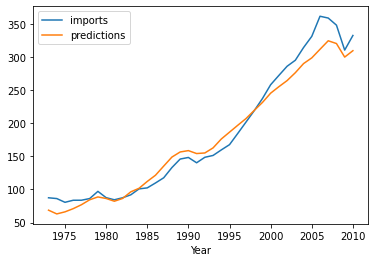

In [14]:
plt.plot("year", "imports", data = df)
plt.plot("year", 'predictions', data = df)

# apply labels to axes and title, show legend
plt.xlabel('Year')
plt.ylabel('')
plt.title('')
plt.legend()                              # Add legend to show which series is which

# Display the graph.
plt.show()

## Regression in logs
As suggested in the book, the forecasting performance is not great, the model does not catch the surging imports after 2003. It may be that a model in logs is more suitable.  First we need to generate the log variables.

In [15]:
df['limports'] = np.log(df['imports'])                      #  The log function is part of the np library
df['lgdp'] = np.log(df['gdp'])
df['lprice_m'] = np.log(df['price_m'])

In [16]:
model2 = smf.ols('limports ~ lgdp + lprice_m', data=df[0:31])    # We refer to the log regression as model2
results2 = model2.fit()                                          # Similarly the results are collected in results2
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               limports   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     902.1
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           3.79e-26
Time:                        12:07:10   Log-Likelihood:                 47.929
No. Observations:                  31   AIC:                            -89.86
Df Residuals:                      28   BIC:                            -85.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6049      1.650     -2.185      0.0

## Predictions

In [17]:
lpredict = results2.predict(df)

In [18]:
df['lpredictions'] = lpredict

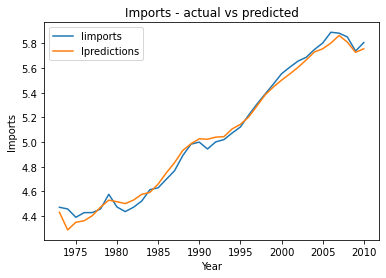

In [19]:
plt.plot("year", "limports",  data = df)
plt.plot("year", 'lpredictions', data = df)

# apply labels to axes and title, show legend
plt.xlabel('Year')
plt.ylabel('Imports')
plt.title('Imports - actual vs predicted')
plt.legend()                              

# Display the graph.
plt.show()

Transforming log predictions back into actual values

In [20]:
df['predictions2'] = np.exp(df['lpredictions'])

In [21]:
print(df[['year', 'imports', 'predictions2']][31:])

    year     imports  predictions2
31  2004  314.218456    308.186039
32  2005  331.074977    315.992906
33  2006  361.457419    331.077588
34  2007  358.735733    352.148039
35  2008  348.003072    333.588091
36  2009  310.368144    307.107338
37  2010  332.434351    316.179498


## Test of compound hypothesis
Such tests may be conducted as a Chow test, as discussed in the book.  We replicate that analysis here.  We test for money illusion in the import demand function.  In other words, should we use the real price of imports as an explanatory variable, or include both the nominal price of imports and the RPI?  (All of this using equations in logs.)
If we cannot reject the hypothesis that the coefficients of nominal import prices and the RPI are equal and opposite then we can use the simpler model with just the real import price.  
First we create the logarithms of nominal import prices and of the rpi.

In [ ]:
#print(results.f_test("gdp = price_m = 0"))

In [22]:
df['lnom_price_m'] = np.log(df['nom_price_m'])
df['lrpi'] = np.log(df['rpi'])

Now we estimate a model (model3) which includes these two variables (as well as real gdp).

In [23]:
model3 = smf.ols('limports ~ lgdp + lnom_price_m + lrpi', data=df[0:31])
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:               limports   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1785.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           3.84e-31
Time:                        12:08:10   Log-Likelihood:                 65.193
No. Observations:                  31   AIC:                            -122.4
Df Residuals:                      27   BIC:                            -116.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.7673      0.669    -13.114   

Now we test for the equality of the coefficients.  We obtain the same value as obtained in the book for the Chow test.

In [24]:
print(results3.f_test("lnom_price_m = -lrpi"))

<F test: F=array([[55.23733946]]), p=5.3898961642488436e-08, df_denom=27, df_num=1>


## Dummy variables


Creating dummy variables in Python is done in the following manner. As in the book, we create a dummy variable which is 0 for 1973-78, 1 for 1979 and after.  The code is a little convoluted.

In [25]:
nsample = 38                                    # Create a variable for the dummy
groups = np.zeros(nsample, int)                 # Set all obs = 0
groups[6:] = 1                                  # Set obs after 1978 = 1
dummy = pd.get_dummies(groups).values           # Creates two dummies from the variable groups. 
df2 = DataFrame(dummy,columns=['pre','post'])   # Add the dummies to a new dataframe, calling them 'Pre' and 'Post'
df = pd.concat([df, df2], axis = 1)             # Merge with the original dataframe

Now estimate a new model with the dummy variable.  We only include one of the two dummies we created.

In [26]:
model4 = smf.ols('limports ~ lgdp + lprice_m + post', data=df[0:31])
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:               limports   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1029.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           6.16e-28
Time:                        12:09:25   Log-Likelihood:                 56.717
No. Observations:                  31   AIC:                            -105.4
Df Residuals:                      27   BIC:                            -99.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9767      1.301     -3.826      0.0